In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
data, target, coef = datasets.make_regression(n_features=2, n_informative=1, n_targets=1, 
                                        noise=5, coef=True, random_state=2)

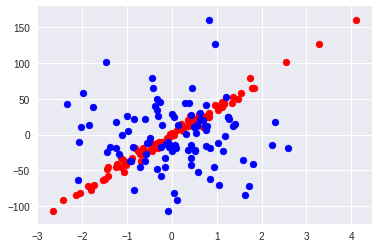

In [5]:
pylab.scatter(map(lambda x : x[0], data), target, color = 'r')
pylab.scatter(map(lambda x : x[1], data), target, color = 'b')

In [0]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target, test_size = 0.3)

In [0]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(train_data, train_labels)
predictions = linear_regression.predict(test_data)

In [17]:
print test_labels

[ 25.24428409 -37.31870104 -84.32102748 -52.37232463  11.96165156
 -80.80239408  24.82763821 160.09441244   1.72644759 -22.33224966
  18.17188553 -15.01435792 -16.85466265 -36.44717565  19.66406455
  13.02656201  21.20540389 -32.92158843 101.14760598 -71.3715844
 -76.75213382 -22.64686884 -45.38589148  12.67156468 -10.29545833
 -61.47026695 -12.0017312  -13.99339669  25.7124082  -40.84204295]


In [20]:
print predictions

[ 14.52198658 -34.49703384 -79.35090491 -39.64289681  14.08932831
 -76.8450959   30.7475028  154.86798869   0.20539086 -28.27959447
  17.87930879  -8.74634915 -16.30780967 -40.5701779   26.48622913
  18.63901736  17.01008834 -33.29003565  94.70239952 -69.20852465
 -68.17512815 -16.89145909 -43.30231209  13.98582492 -10.90830669
 -55.32040224  -6.35560004 -14.46648857  27.41723519 -44.84605792]


In [21]:
metrics.median_absolute_error(test_labels, predictions)

4.159158903077074

In [23]:
linear_scoring = cross_validation.cross_val_score(linear_regression, data, target, scoring = 'mean_absolute_error', cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: -4.07007149878, std: 1.07371044929


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python2.7/dist-packages/s

In [0]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=True)

In [25]:
linear_scoring = cross_validation.cross_val_score(linear_regression, data, target, scoring = scorer, cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()) 

mean: 4.07007149878, std: 1.07371044929


In [26]:
coef

array([38.07925837,  0.        ])

In [27]:
linear_regression.coef_

array([37.59610255,  0.68923047])

In [47]:
print "Origin:"
print "y = {:.2f} * x1 + {:.2f} * x2".format(coef[0], coef[1])
print "Linear regression:"
print "y = {:.2f} * x1 + {:.2f} * x2".format(linear_regression.coef_[0], linear_regression.coef_[1])

Origin:
y = 38.08 * x1 + 0.00 * x2
Linear regression:
y = 37.60 * x1 + 0.69 * x2


In [0]:
lasso_regressor = linear_model.Lasso(random_state=3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [41]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print 'mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()) 

mean: 4.15447824667, std: 1.0170354385


In [46]:
print "Origin:"
print "y = {:.2f} * x1 + {:.2f} * x2".format(coef[0], coef[1])
print "Lasso:"
print "y = {:.2f} * x1 + {:.2f} * x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1])

Origin:
y = 38.08 * x1 + 0.00 * x2
Lasso:
y = 36.67 * x1 + 0.00 * x2
